In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [254]:
df = pd.read_csv('wipro.csv')

df.shape

(244, 15)

In [0]:
df.head
df.reset_index(drop=True, inplace=True)

In [256]:
df.shape

(244, 15)

In [257]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,WIPRO,EQ,26-Apr-2019,295.20,296.40,296.65,293.50,294.40,294.80,295.21,6196551,1.829265e+09,120833,3369963,54.38
1,WIPRO,EQ,30-Apr-2019,294.80,295.00,299.45,295.00,298.55,298.55,297.52,7339917,2.183791e+09,74491,4068415,55.43
2,WIPRO,EQ,02-May-2019,298.55,298.55,298.85,292.65,293.85,293.65,294.97,4539125,1.338884e+09,48820,2520963,55.54
3,WIPRO,EQ,03-May-2019,293.65,293.50,293.70,288.55,291.65,290.90,290.38,7408308,2.151239e+09,158714,4380862,59.13
4,WIPRO,EQ,06-May-2019,290.90,289.90,293.80,289.20,290.90,290.85,291.50,4304345,1.254732e+09,67172,1711610,39.76


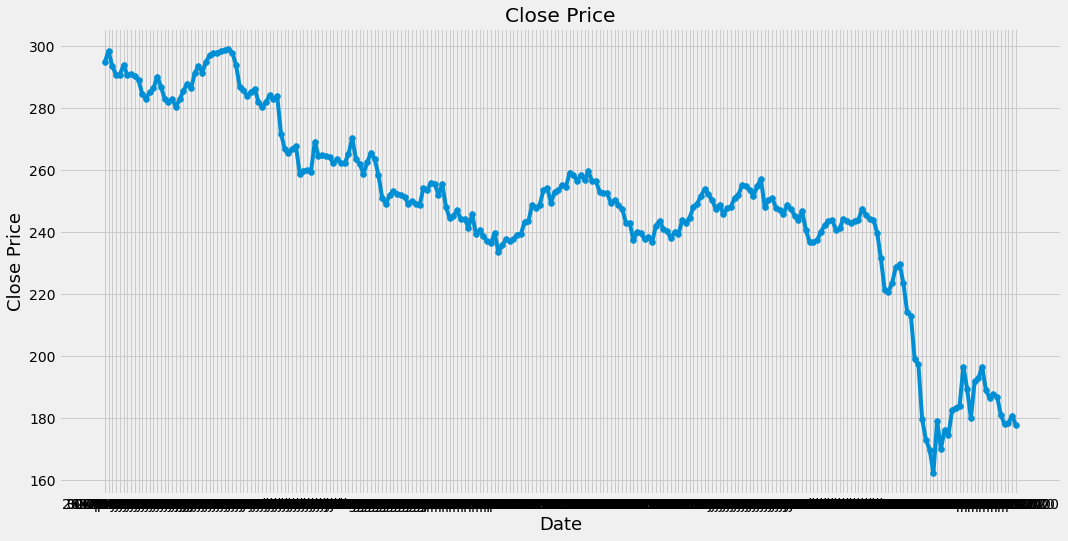

In [258]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.scatter(df['Date'], df['Close Price'])
plt.plot(df['Date'], df['Close Price'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close Price'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [260]:
training_data_len

196

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [262]:
len(scaled_data)

244

In [263]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

196

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(3, len(train_data)):
    x_train.append(train_data[i-3:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [269]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
193/193 [==============================] - 1s 6ms/step - loss: 0.0302


In [270]:
#Test data set
test_data = scaled_data[training_data_len - 1: , : ]
len(test_data)

49

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(3,len(test_data)):
    x_test.append(test_data[i-3:i,0])

In [272]:
x_test

[array([0.57419591, 0.57675439, 0.6001462 ]),
 array([0.57675439, 0.6001462 , 0.59502924]),
 array([0.6001462 , 0.59502924, 0.58881579]),
 array([0.59502924, 0.58881579, 0.59539474]),
 array([0.58881579, 0.59539474, 0.59722222]),
 array([0.59539474, 0.59722222, 0.62317251]),
 array([0.59722222, 0.62317251, 0.60928363]),
 array([0.62317251, 0.60928363, 0.59831871]),
 array([0.60928363, 0.59831871, 0.59758772]),
 array([0.59831871, 0.59758772, 0.56688596]),
 array([0.59758772, 0.56688596, 0.50621345]),
 array([0.56688596, 0.50621345, 0.43201754]),
 array([0.50621345, 0.43201754, 0.42726608]),
 array([0.43201754, 0.42726608, 0.44846491]),
 array([0.42726608, 0.44846491, 0.48611111]),
 array([0.44846491, 0.48611111, 0.49232456]),
 array([0.48611111, 0.49232456, 0.44736842]),
 array([0.49232456, 0.44736842, 0.38048246]),
 array([0.44736842, 0.38048246, 0.37097953]),
 array([0.38048246, 0.37097953, 0.26864035]),
 array([0.37097953, 0.26864035, 0.25621345]),
 array([0.26864035, 0.25621345, 0.

In [273]:
y_test

array([[241.25],
       [244.45],
       [243.75],
       [242.9 ],
       [243.8 ],
       [244.05],
       [247.6 ],
       [245.7 ],
       [244.2 ],
       [244.1 ],
       [239.9 ],
       [231.6 ],
       [221.45],
       [220.8 ],
       [223.7 ],
       [228.85],
       [229.7 ],
       [223.55],
       [214.4 ],
       [213.1 ],
       [199.1 ],
       [197.4 ],
       [179.75],
       [173.1 ],
       [169.95],
       [162.35],
       [179.2 ],
       [170.15],
       [176.35],
       [174.65],
       [182.6 ],
       [183.5 ],
       [184.15],
       [196.7 ],
       [189.5 ],
       [180.  ],
       [191.9 ],
       [192.9 ],
       [196.7 ],
       [189.2 ],
       [186.55],
       [187.85],
       [187.  ],
       [181.1 ],
       [178.05],
       [178.55],
       [180.9 ],
       [177.75]])

In [274]:
len(x_test)

46

In [275]:
len(y_test)

48

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [279]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

ValueError: ignored

In [0]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()